In [1]:
pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\user5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima


In [3]:
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.isna().sum()

#Passengers    0
dtype: int64

In [6]:
df.columns = ['nPass']

### Visualize the time series data

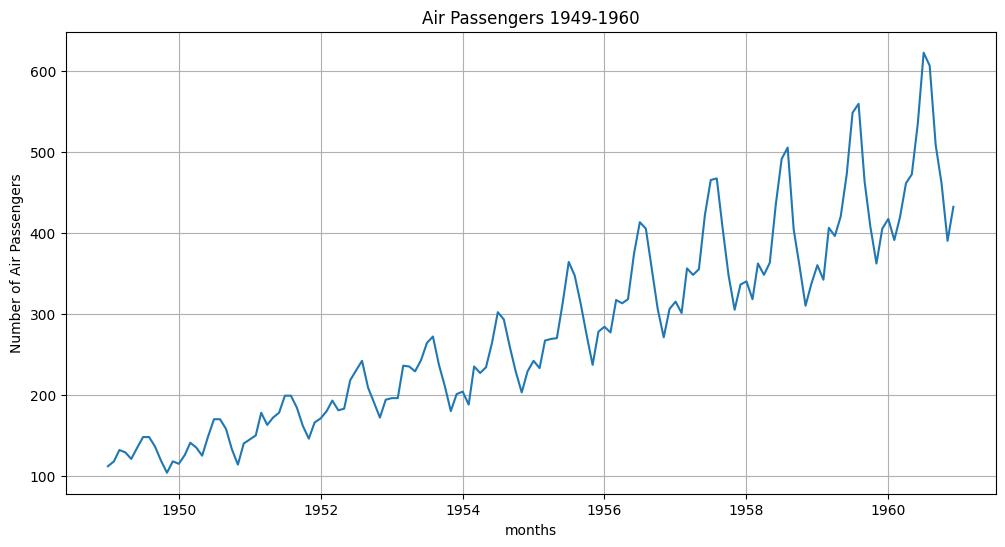

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['nPass'])
plt.xlabel('months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.show()

### Time Seires Decomposition

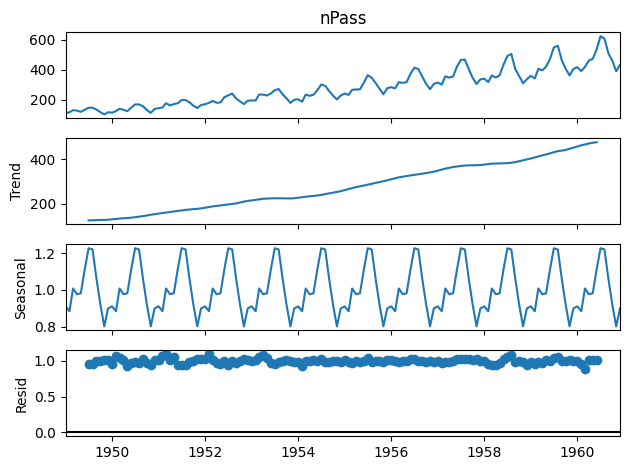

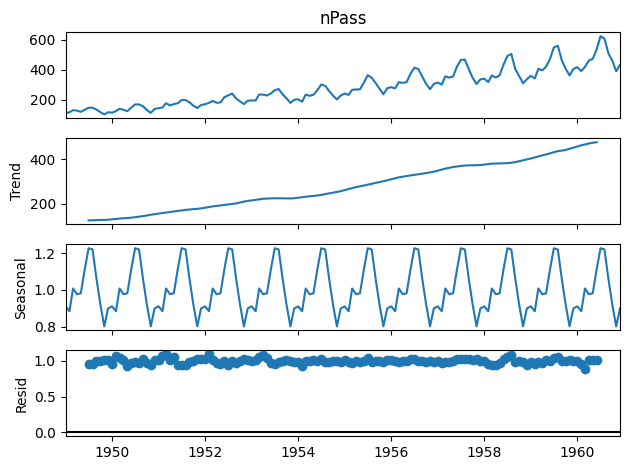

In [8]:
Q = seasonal_decompose(df['nPass'], model='multilicative')
Q.plot()

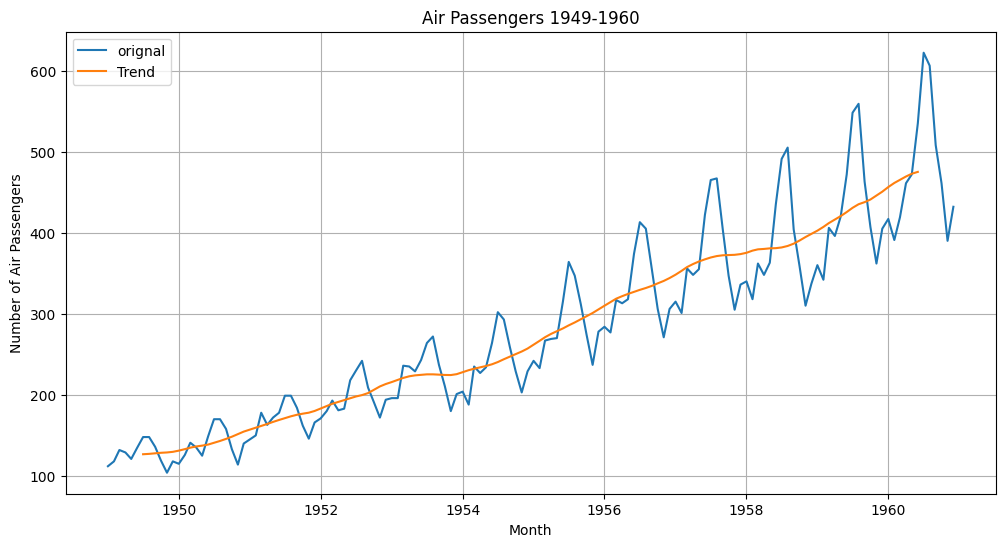

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['nPass'], label = 'orignal')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.legend()
plt.show()

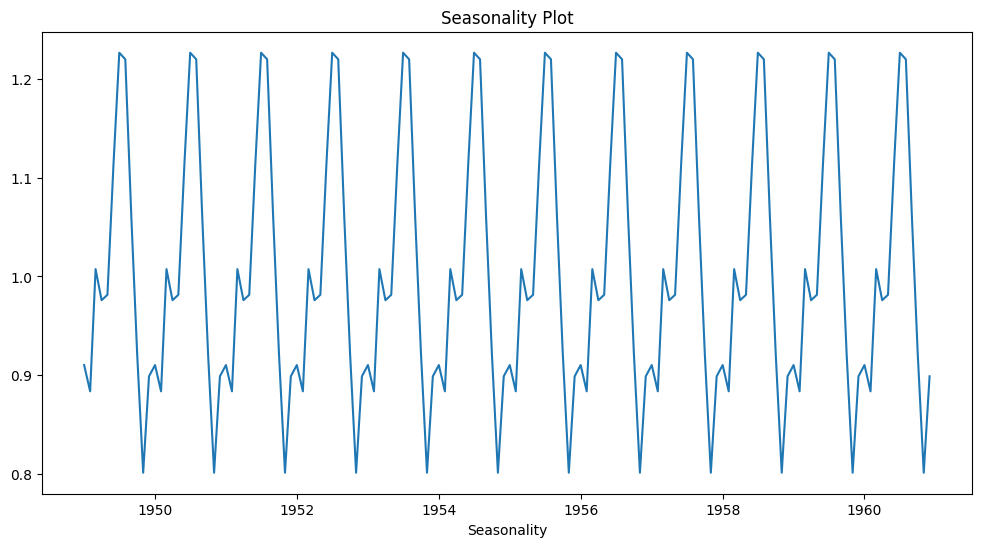

In [10]:
plt.figure(figsize=(12,6))
plt.plot(Q.seasonal)
plt.xlabel('Seasonality')
plt.title('Seasonality Plot')
plt.show()

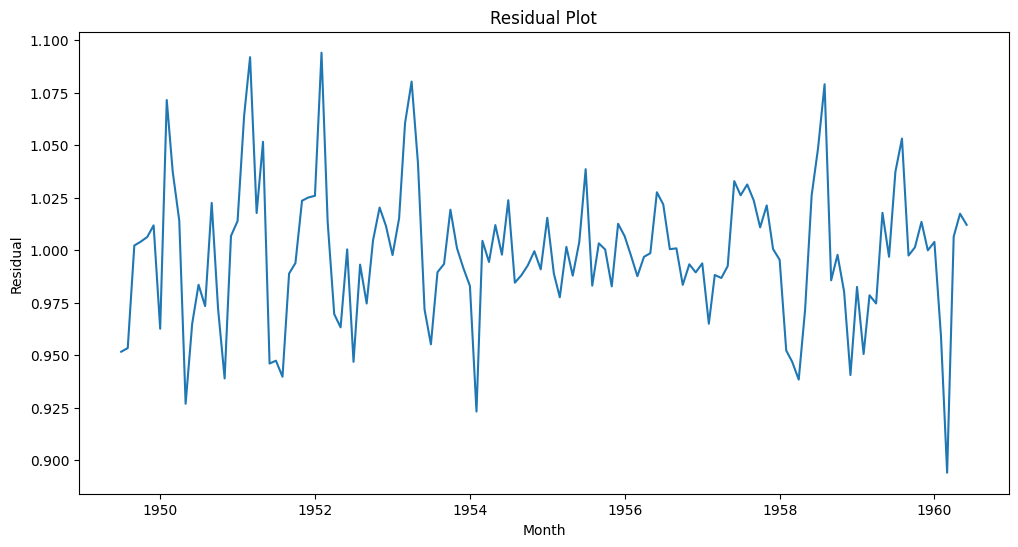

In [11]:
plt.figure(figsize=(12,6))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

### Time Series Forecasting
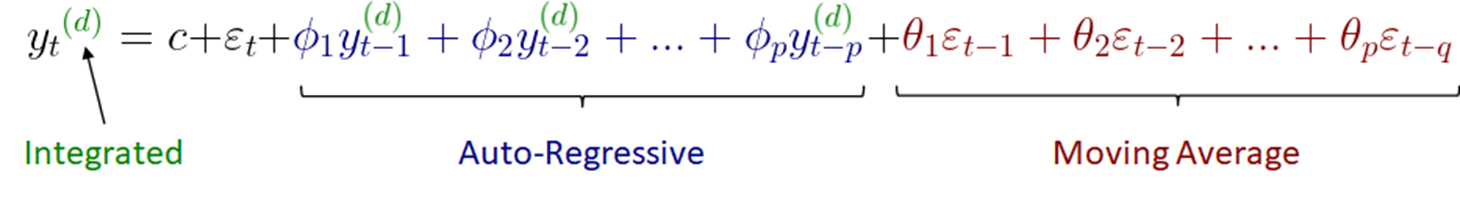

In [12]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\user5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
model = auto_arima(df['nPass'], seasonal=True, m=12)

In [15]:
model.order

(2, 1, 1)

In [16]:
p = model.order[0]
q = model.order[1]
r = model.order[2]

In [17]:
p

2

In [18]:
q

1

In [19]:
r

1

### Predict the forcasted values for next 3 years

In [20]:
forcast, conf = model.predict(n_periods=36, return_conf_int=True)
forcast

1961-01-01    445.634991
1961-02-01    420.395103
1961-03-01    449.198451
1961-04-01    491.840095
1961-05-01    503.394633
1961-06-01    566.862610
1961-07-01    654.260334
1961-08-01    638.597642
1961-09-01    540.883890
1961-10-01    494.126763
1961-11-01    423.332843
1961-12-01    465.507703
1962-01-01    479.291063
1962-02-01    454.177067
1962-03-01    483.087234
1962-04-01    525.819514
1962-05-01    537.450958
1962-06-01    600.984190
1962-07-01    688.437283
1962-08-01    672.821572
1962-09-01    575.147683
1962-10-01    528.424380
1962-11-01    457.659160
1962-12-01    499.858372
1963-01-01    513.662395
1963-02-01    488.565931
1963-03-01    517.490975
1963-04-01    560.235877
1963-05-01    571.878032
1963-06-01    635.420351
1963-07-01    722.881156
1963-08-01    707.271987
1963-09-01    609.603650
1963-10-01    562.885057
1963-11-01    492.123834
1963-12-01    534.326437
Freq: MS, dtype: float64

In [21]:
conf

array([[423.34487759, 467.92510471],
       [394.23551428, 446.55469252],
       [419.83188992, 478.56501199],
       [460.37649263, 523.3036964 ],
       [470.38073086, 536.40853522],
       [532.6996341 , 601.02558583],
       [619.22147403, 689.2991947 ],
       [602.88020044, 674.31508414],
       [504.63159492, 577.13618588],
       [457.44624137, 530.80728383],
       [386.30414338, 460.361543  ],
       [428.19161369, 502.82379164],
       [433.49782381, 525.08430198],
       [405.10923684, 503.2448968 ],
       [431.15603588, 535.01843199],
       [471.84098531, 579.79804326],
       [481.87404375, 593.02787316],
       [544.15707729, 657.81130293],
       [630.60926527, 746.26530151],
       [614.17967749, 731.46346653],
       [515.83290928, 634.46245755],
       [468.5446067 , 588.30415285],
       [397.29775817, 518.02056239],
       [439.08041924, 560.63632426],
       [446.32772851, 580.99706096],
       [418.31885906, 558.81300308],
       [444.62493726, 590.35701177],
 

### Add above results in dataframe

In [22]:
df_forcast = forcast.to_frame()
df_forcast.columns = ['forcast']
df_forcast

,forcast
1961-01-01,445.634991
1961-02-01,420.395103
1961-03-01,449.198451
1961-04-01,491.840095
1961-05-01,503.394633
1961-06-01,566.862610
1961-07-01,654.260334
1961-08-01,638.597642
1961-09-01,540.883890
1961-10-01,494.126763


In [23]:
df_forcast[['Low_conf', 'Upper_conf']] = conf
df_forcast

,forcast,Low_conf,Upper_conf
1961-01-01,445.634991,423.344878,467.925105
1961-02-01,420.395103,394.235514,446.554693
1961-03-01,449.198451,419.831890,478.565012
1961-04-01,491.840095,460.376493,523.303696
1961-05-01,503.394633,470.380731,536.408535
1961-06-01,566.862610,532.699634,601.025586
1961-07-01,654.260334,619.221474,689.299195
1961-08-01,638.597642,602.880200,674.315084
1961-09-01,540.883890,504.631595,577.136186
1961-10-01,494.126763,457.446241,530.807284


In [24]:
df_forcast['forcast'] = df_forcast['forcast'].apply(round)

In [25]:
df_forcast.head()

,forcast,Low_conf,Upper_conf
1961-01-01,446,423.344878,467.925105
1961-02-01,420,394.235514,446.554693
1961-03-01,449,419.831890,478.565012
1961-04-01,492,460.376493,523.303696
1961-05-01,503,470.380731,536.408535


In [26]:
for i in df_forcast.columns:
    df_forcast[i] = df_forcast[i].apply(round)

In [27]:
df_forcast

,forcast,Low_conf,Upper_conf
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


### Save above dataframe to csv

In [28]:
df_forcast.to_csv('AirPassengersForcast.csv')

### Visualizing above results

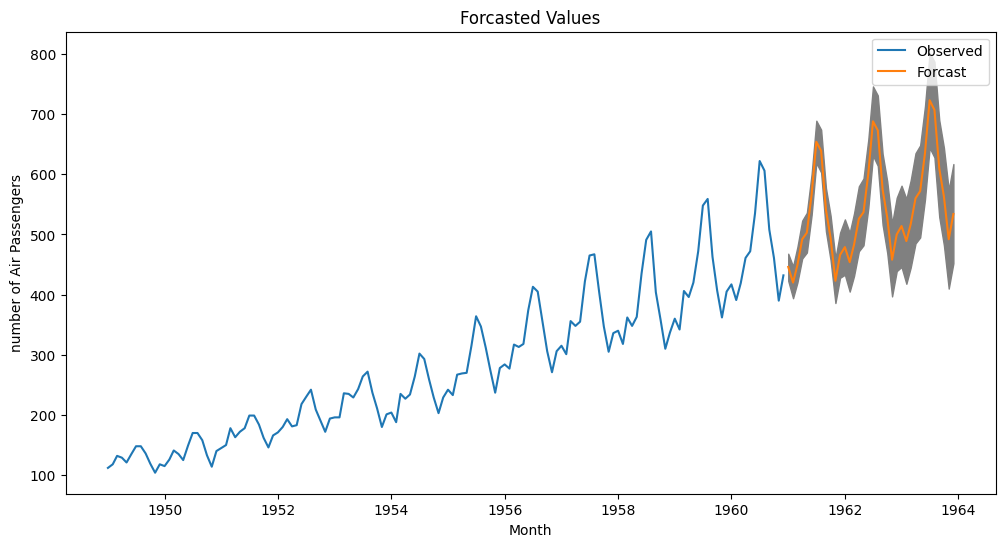

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['nPass'], label = 'Observed')
plt.plot(df_forcast['forcast'], label = 'Forcast')
plt.fill_between(df_forcast.index, df_forcast['Low_conf'], df_forcast['Upper_conf'], color='gray')
plt.xlabel('Month')
plt.ylabel('number of Air Passengers')
plt.title('Forcasted Values')
plt.legend()
plt.show()